In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify_modify  as  squarify  
from function import *
# Create a data frame with fake data


In [2]:
def draw_treemap(weight_list, label_list):

    df = pd.DataFrame({'weight':weight_list, 'group':label_list })

    # plot it
    
    squarify.plot(sizes=df['weight'], label=df['group'], alpha=.8,rectangle_size=rectangle_size,pad=Gap_size,value=[])
    plt.axis('off')
    plt.show()
    

    


[3, 10, 5, 5, 5, 5, 2, 7, 5, 6]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


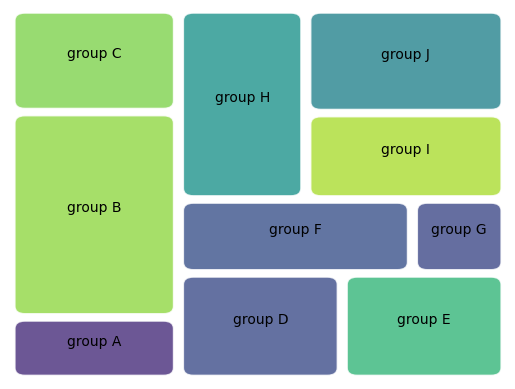

[7, 10, 6, 9, 8, 5, 8, 6, 8, 2]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


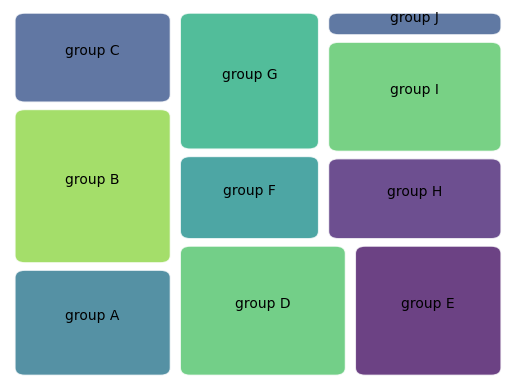

[10, 1, 8, 8, 2, 2, 3, 5, 2, 10]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


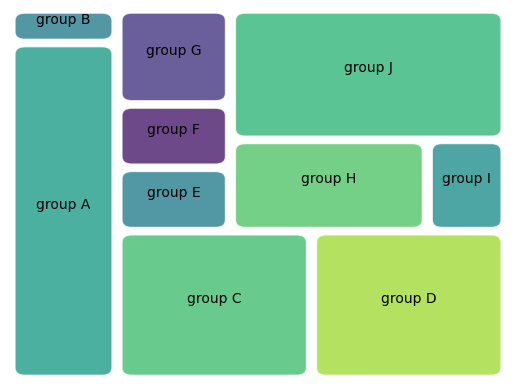

[7, 3, 4, 4, 3, 4, 8, 3, 8, 9]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


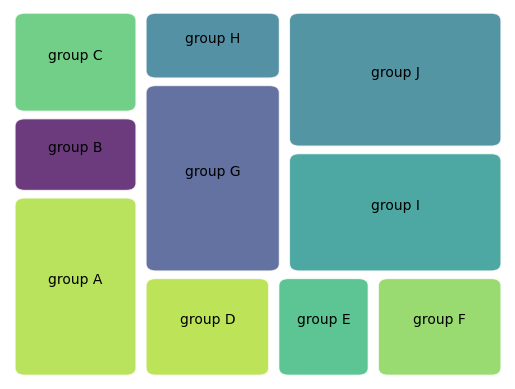

[6, 6, 6, 2, 6, 2, 8, 6, 9, 1]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


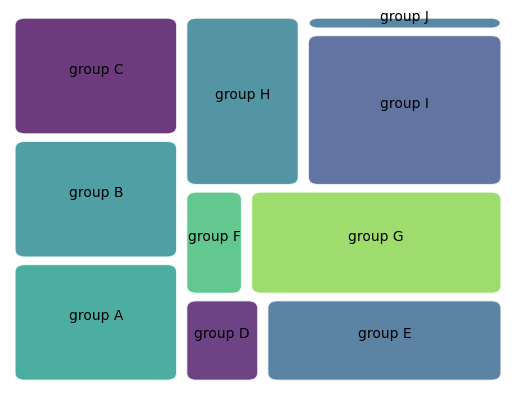

[8, 8, 2, 5, 8, 9, 3, 6, 10, 9]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


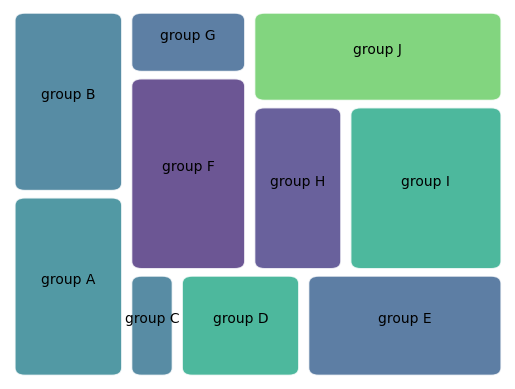

[8, 5, 2, 2, 3, 2, 2, 4, 3, 4]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


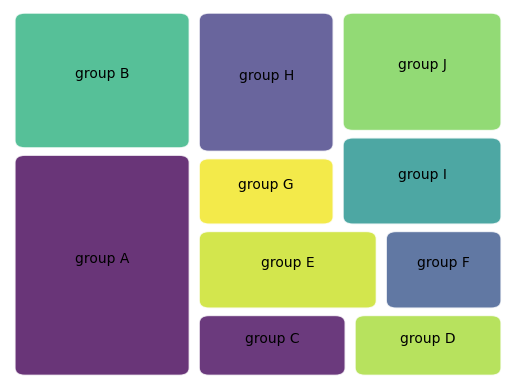

[8, 10, 9, 1, 8, 10, 5, 6, 1, 7]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


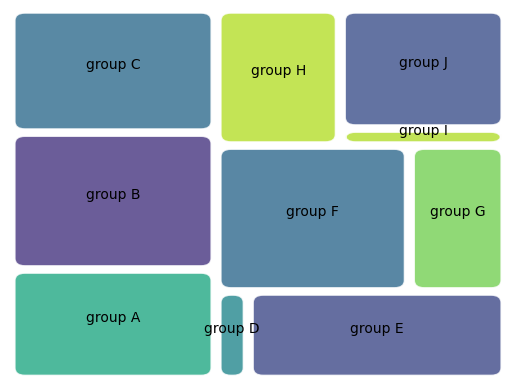

[6, 2, 2, 4, 10, 2, 8, 2, 3, 9]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


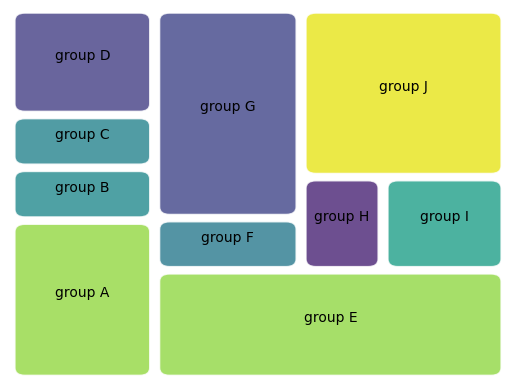

[3, 8, 2, 1, 4, 10, 3, 10, 1, 4]
['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']


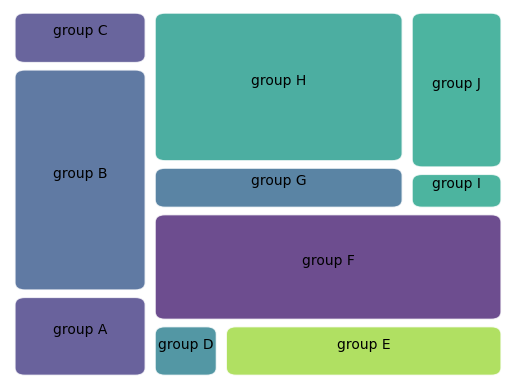

In [3]:


# example : weight_list = [4,3,1,10,2,3,6,1,3,2] 
# example : label_list = ["group A", "group B", "group C", "group D", ... ]
num_weights = 10
max_weight = 10
num_groups = num_weights
label_list = generate_group_list(num_groups)
print(label_list)


# 间隙像素,如果为0则没有间隙
Gap_size=1
# 圆角半径，如果为0则没有圆角
rectangle_size = 2

for i in range(10):
    weight_list = generate_weight_list(num_weights, max_weight)
    print(weight_list)
    draw_treemap(weight_list, label_list)

# weight_list = generate_weight_list(num_weights, max_weight)
# print(weight_list)
# label_list = generate_group_list(num_groups)
# print(label_list)
# draw_treemap(weight_list, label_list)